# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Logit/sigmoid function

$$g(\boldsymbol{\theta}^T\mathbf{x}) \in \{0, 1\}$$

$$ h = g(\boldsymbol{\theta}^T\mathbf{x}) = \frac{1}{1+e^{-\boldsymbol{\theta}^T\mathbf{x}}} $$

## Euler function

Text(0, 0.5, 'e^-x')

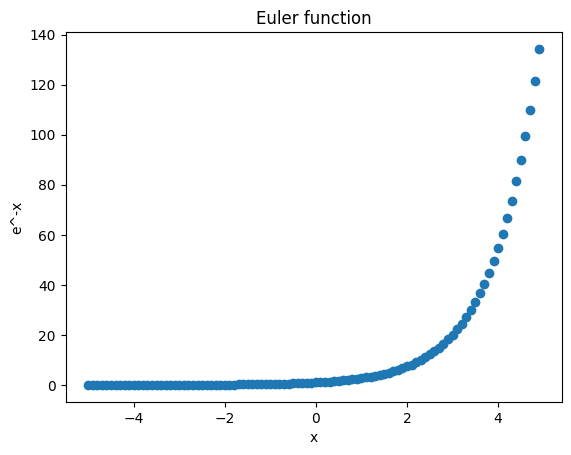

In [2]:
euler = lambda x: np.exp(x)
x     = np.arange(-5, 5, 0.1)
y     = euler(x)

plt.scatter(x, y)
plt.title("Euler function")
plt.xlabel("x")
plt.ylabel("e^-x")

## Sigmoid function

Text(0, 0.5, 'sigmoid(x)')

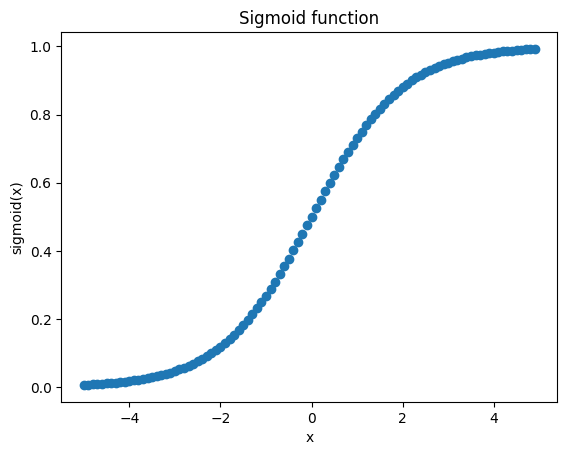

In [3]:
sigmoid = lambda x: (1+np.exp(-x))**-1

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.scatter(x, y)
plt.title("Sigmoid function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")

## Example

In [4]:
X = np.array([3, 4])  #1 sample, 2 features
theta = np.array([1, 2])  #theta for the 2 features

In [5]:
X @ theta

11

In [6]:
sigmoid(X @ theta)

0.999983298578152

In [7]:
np.round(sigmoid(X @ theta))

1.0

## Loss function for classification


**Binary cross-entropy**

$$J = - (\sum_{i=1}^m y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)}))$$

In [8]:
def ce(y, h):  
    #y shape: (m, )
    #h shape: (m, )
    loss = - np.sum( y * np.log(h)     +     (1 - y) * np.log(1-h) )
    
    return loss

In [9]:
#if the y does not match with h, we want high loss
y     = np.array([1, 1, 0, 0, 1])
bad_h = np.array([0.01, 0.01, 0.99, 0.99, 0.99])

ce(y, bad_h)

18.430731079805867

In [10]:
good_h = np.array([0.99, 0.99, 0.01, 0.01, 0.99])

ce(y, good_h)

0.05025167926750725

## Gradient of binary cross entropy

$$J = - (y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)}))$$
$$h = \frac{1}{1+e^{-g}}$$
$$g = \boldsymbol{\theta}^T\mathbf{x}$$


Thus, gradient of $J$ in respect to some $\theta_j$ is

$$\frac{\partial J}{\partial \theta_j} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}$$

$$ \frac{\partial J}{\partial \theta} = \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$$


## Let's implement!

### 1: Prepare your data

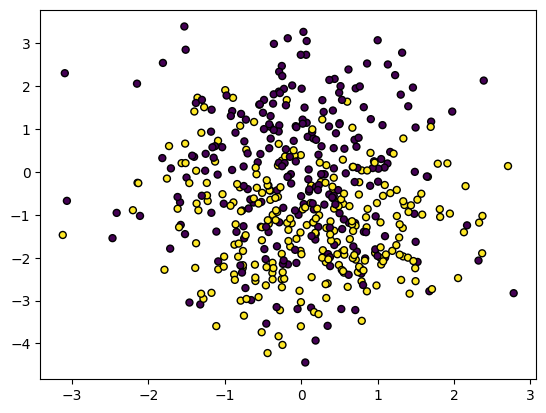

In [11]:
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# feature scaling helps reaching convergence faster
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#add intercepts
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

### 2: Fit your algorithm 

#### 2.1 Training

In [12]:
#fit
def fit(X, y, max_iter=1000):
    theta = np.zeros(X.shape[1])
    lr    = 0.01
    bs    = int(0.1 * X.shape[0])
    
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0]) #<==with replacement
        mini_X = X[ix:ix+bs]
        mini_y = y[ix:ix+bs]
        loss, grad = grad_fn(mini_X, mini_y, theta)
        if i % 500 == 0:
            print(f"Loss {i}", loss)
        theta = theta - lr * grad
    return theta, i
        
#grad
def grad_fn(X, y, theta):
    #X shape: (m, n)
    #y shape: (n,  )
    m = X.shape[0]
    h = predict(X, theta)
    grad = X.T @ (h - y)
    loss = (- np.sum(y * np.log(h) + (1 - y) * np.log(1-h))) / m
    return loss, grad

#sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#predict
def predict(X, theta):
    return sigmoid(X @ theta)     

#output
def output(pred):
    return np.round(pred)


#### 2.2 Compute accuracy

In [13]:
#train
theta, i = fit(X_train, y_train, max_iter=10000)

Loss 0 0.6931471805599452
Loss 500 0.36216780885256944
Loss 1000 0.5147591730678431
Loss 1500 0.3464364339570545
Loss 2000 0.3859274208490927
Loss 2500 0.39994711316910225
Loss 3000 0.36530822228735194
Loss 3500 0.34429594293490456
Loss 4000 0.3986101258835183
Loss 4500 0.25254718613844757
Loss 5000 0.4783916472581656
Loss 5500 0.2829307234183998
Loss 6000 0.4095556303566722
Loss 6500 0.4195770927967235
Loss 7000 0.42194829656834926
Loss 7500 0.2880263544712154
Loss 8000 0.481560647286498
Loss 8500 0.314883470032724
Loss 9000 0.37762928703435755
Loss 9500 0.29492932030066116


In [14]:
#test
yhat = output(predict(X_test, theta))
yhat

array([0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.8

## 3. Inference

Try to do this by yourself.